#Conway's Game of Life

From Wikipedia: https://en.wikipedia.org/wiki/Conway's_Game_of_Life

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970.

The "game" is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves or, for advanced players, by creating patterns with particular properties.

The Rules of Life:

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive or dead. Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

  1. Any live cell with fewer than two live neighbours dies, as if caused by under-population.
  2. Any live cell with two or three live neighbours lives on to the next generation.
  3. Any live cell with more than three live neighbours dies, as if by overcrowding.
  4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Lets import all the necessary libraries: 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from random import randint

We will use the time library to pause the program during visualization (it keeps the changes from happening too quickly)

We will use numpy to create a matrix to act as our game board

We will use matplotlib's pyplot to actually do the visualization

we will use random to generate random numbers for the starting conditions (randomness adds flavor)

Now there are some constants the program will need:
    1. Box size  (A small multiple of 100 will do)
    2. Max number of steps (how long our program can run before terminating)
    3. A step counter (to make sure the game will end)

In [2]:
# The box is [0,L] in both x and y directions
L = 100

# The maximum number of steps
max_steps = 100000

# Step counter
n = 0

We will also need our game board. We will create multiple boards:
    - 2 previous (to test if the game has ended)
    - 1 current  (to save the current step)
    - 1 future   (to calculate the next step)

In [3]:
#The grids of step n-2, n-1, n, and n+1
previous1 = np.zeros((L,L))
previous2 = np.zeros((L,L))
current = np.zeros((L,L))
future  = np.zeros((L,L))

Now we need to initialize our game board with random starting positions. I chose (arbitrarily) to have 500 randomly placed starting "alive" pieces clustered in the center of my board. "Alive" pieces will hold a value of 1 on the gameboard and "dead" pieces will hold a value of 0. Note that the boards were created full of zeros (aka all "dead" pieces).

In [4]:
def initialize_board(L, current):
    ''' 
        Initializes the gameboard with 500 randomly positioned alive pieces.
        Input parameters:
                L - box size (an integer)
                current - current game board (a 2D numpy array)
    '''
    for i in range(0,500):
        x = randint(20,L-20)
        y = randint(20,L-20)
        current[x][y] = 1

Now lets write a function to set up the initial display using the matplotlib libraries pyplot commands:

In [5]:
def initialize_plot(current):
    ''' 
        Displays initial game board.
        Input parameters: 
                current - current game board (a 2D numpy array)
    '''   
    im = plt.imshow(current, cmap = 'Greys', interpolation = 'nearest')
    im.axes.get_xaxis().set_visible(False)
    im.axes.get_yaxis().set_visible(False)
    plt.ion()
    plt.show()
    
    return im

Now for the final part of the game, we need to write a function that will calculate the next step and update the display.

In [6]:
def update_board(current):
    ''' 
        Update the game board.
        Input parameters: 
                current - current game board (a 2D numpy array)
                im      - a matplotlib image
    '''  
    # Calculate next step
    # Clear old update
    future = np.zeros((L,L))

    # Check each cell for its living neighbors to see if it lives in the next iteration
    for i in range(0,L):
        for j in range(0,L):
            neighbors = 0
            neighbors += current[i-1][j-1] + current[i][j-1] + current[(i+1)%L][j-1] +  \
                         current[i-1][j]   +                   current[(i+1)%L][j]   +  \
                         current[i-1][(j+1)%L] + current[i][(j+1)%L] + current[(i+1)%L][(j+1)%L]
            
            # Living cell dies due to underpopulation
            if current[i][j] == 1 and neighbors < 2:
                future[i][j] = 0
            # Living cell continues living 
            elif current[i][j] == 1 and neighbors == 2 or neighbors == 3:   
                future[i][j] = 1
            # Cell dies, as if by overcrowding
            elif current[i][j] == 1 and neighbors > 3:
                future[i][j] = 0
            # Dead cell is now living, as if by reproduction
            elif current[i][j] == 0 and neighbors == 3:
                future[i][j] == 1

    # Return the updated game board
    return future


Lets play the game!

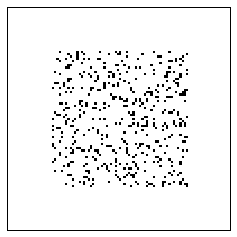

/Users/bryansundahl/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


NotImplementedError: 

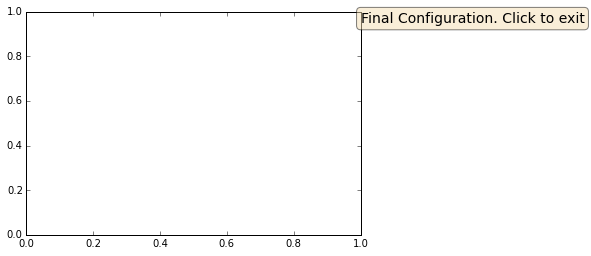

In [7]:
# Initialize board
initialize_board(L, current)

# Initialize the plot
im = initialize_plot(current)

# Start the game!
while 1: # This is always true and hence is an "infinite loop" that will always execute. Be careful
         # when using this.
    
    # Test if either of our end conditions have been reached:
    #    1. steady state has been reached (Only works for period 2 and less oscillations) 
    #    2. max steps reached
    if np.array_equal(current, previous1) or np.array_equal(current,previous2) or n > max_steps:

        # Let user know we've reached steady state and are about to close
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(1,1, 'Final Configuration. Click to exit', fontsize=14, verticalalignment='top', bbox=props)
 
        # Freeze image, and unfreeze on mouse click
        plt.waitforbuttonpress() 
  
        # Unfreezes on click and terminates the program
        break
    
    # Update previous1 and previous2
    previous2 = np.copy(previous1)
    previous1 = np.copy(current)

    # Count the number of steps
    n += 1

    # Calculate next step
    current = update_board(current)
    
    # Update visualization of the board 
    im.set_data(current)
    plt.draw()
    time.sleep(0.01)
               
# Game is over, time to clean up
plt.close("all")